Spark Foundation

# **Aditya Saraf** #
**DATA SCIENCE AND BUSINESS ANALYST INTERN**






# **Task 2 - Prediction Using Unsupervised ML** #
**BATCH- #GRIPJULY2022**

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import seaborn as sns

### Loading Dataset

In [5]:
df = sns.load_dataset('iris')

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Exploratory Data Analysis (EDA)

In [8]:
# Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Checking shape of Dataset
df.shape

(150, 5)

### 150 Columns and 5 Rows

In [10]:
#Checking for null and Missing Values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### No Null Values

In [11]:
# Checking the data type of each attribute
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
# Checking Statistical details of  Dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# Checking co - relation between attributes
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


#### Let's find optimum number if KMeans Clustering and Determine the value of K.

In [14]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:,[0,1,2,3]].values

#within cluster sum of square(wcss)

wcss = []

for i in range(1,10):
    Kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

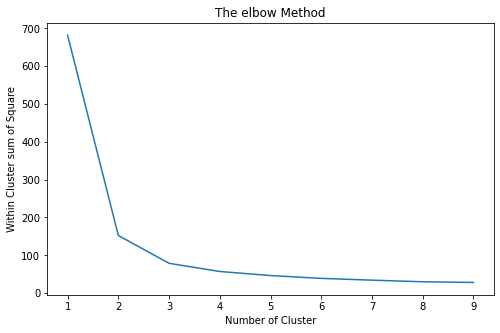

In [15]:
# Plotting the result onto a line graph and graph and allowing us to observe 'The elbow'

plt.figure(figsize=(8,5))
plt.plot(range(1,10), wcss)
plt.title('The elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Within Cluster sum of Square')
plt.show

#### You can see why it is called 'The elbow Method' from the above graph, the optimum cluster is where the elbow occurs. This is when the within cluster sum of square(WCSS) doesn't decrease significantly with every iteration.

### From the above graph we can see that elbow curve starts at K=3, therefore we choose the optimum number of cluster as 3.

In [16]:
# Applying KMeans to the dataset / Creating the kmeans classifier.

Kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)

y_kmeans = Kmeans.fit_predict(x)

## Visualization of Clusters

Text(0.5, 1.0, 'k- Means Clustering')

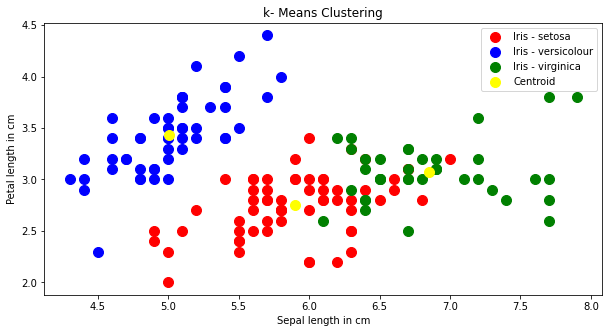

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c='red', label= 'Iris - setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c='blue', label= 'Iris - versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='green', label= 'Iris - virginica')

plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroid')

plt.legend()
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.title('k- Means Clustering')

### From the figure we can conclude that: Red, Green, Blue are the clusters with their espective centroid marked with yellow colour.

### Thus, we clearly conclude from the visual that the optimum number of cluster is 3.

# Thank You